In [1]:
from legend_plot_style import LEGENDPlotStyle as lps
lps.use("legend_talks")
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import matplotlib.ticker as ticker

file_path = '/home/eric/sim/WWLegend/Archive/WLS/'
file_path_2 = '/home/eric/sim/WLSfoil/build/'

LambdaIn, LambdaOut = np.loadtxt(file_path_2 + "output0_nt_Hits.csv", dtype=float, delimiter=',', skiprows=6, unpack=True)

Now reproduce the 3 Plots. First Plot: Reflectivity!

In [2]:
def Get_Percentage_Absorbed(LambdaIn, LambdaOut, wavelengths):
    """ Takes the Incident wavelengths LambdaIn and the outgoing wavelength LambdaOut
        and array wavelengths. Returns an array stating the percantage of absorbed
        photons per wavelength in wavelengths."""
    results_array = np.array([])
    for i in wavelengths:
        First = LambdaIn[LambdaIn == i]
        Second = LambdaOut[LambdaIn == i]
        if First.shape != Second.shape:
            raise ValueError("Arrays must have the same length! rip")
        reflected_elements = np.sum(First == Second)
        percentage_reflected = (reflected_elements / First.size) * 100
        percentage_absorbed = 100 - percentage_reflected
        results_array = np.append(results_array, percentage_absorbed)
    return results_array

def Get_Percentage_Reflected(wavelengths):
    """ DOES NOT RETURN ACTUAL REFLECTANCE!
        Takes an array wavelengths and returns an array consisting of 100 matching the shape.
        Reason is to reproduce VM2000 plot."""
    results_array = np.array([])
    for i in wavelengths:
        results_array = np.append(results_array, 100)
    return results_array

def Get_Percentage_Absorbed_for_WLS(LambdaIn, LambdaOut, wavelengths):
    """ Takes the Incident wavelengths LambdaIn and the outgoing wavelength LambdaOut
        and array wavelengths. Returns an array stating the percantage of absorbed
        photons used in WLS per wavelength in wavelengths."""
    results_array = np.array([])
    for i in wavelengths:
        First = LambdaIn[LambdaIn == i]
        Second = LambdaOut[LambdaIn == i]
        if First.shape != Second.shape:
            raise ValueError("Arrays must have the same length! rip")
        reflected_elements = np.sum((First == Second) | (Second == 0))
        percentage_reflected = (reflected_elements / First.size) * 100
        percentage_absorbed = 100 - percentage_reflected
        results_array = np.append(results_array, percentage_absorbed)
    return results_array

Plot

/tmp/ipykernel_5740/4256103025.py:12: RuntimeWarning: invalid value encountered in scalar divide
  percentage_reflected = (reflected_elements / First.size) * 100
/tmp/ipykernel_5740/4256103025.py:37: RuntimeWarning: invalid value encountered in scalar divide
  percentage_reflected = (reflected_elements / First.size) * 100


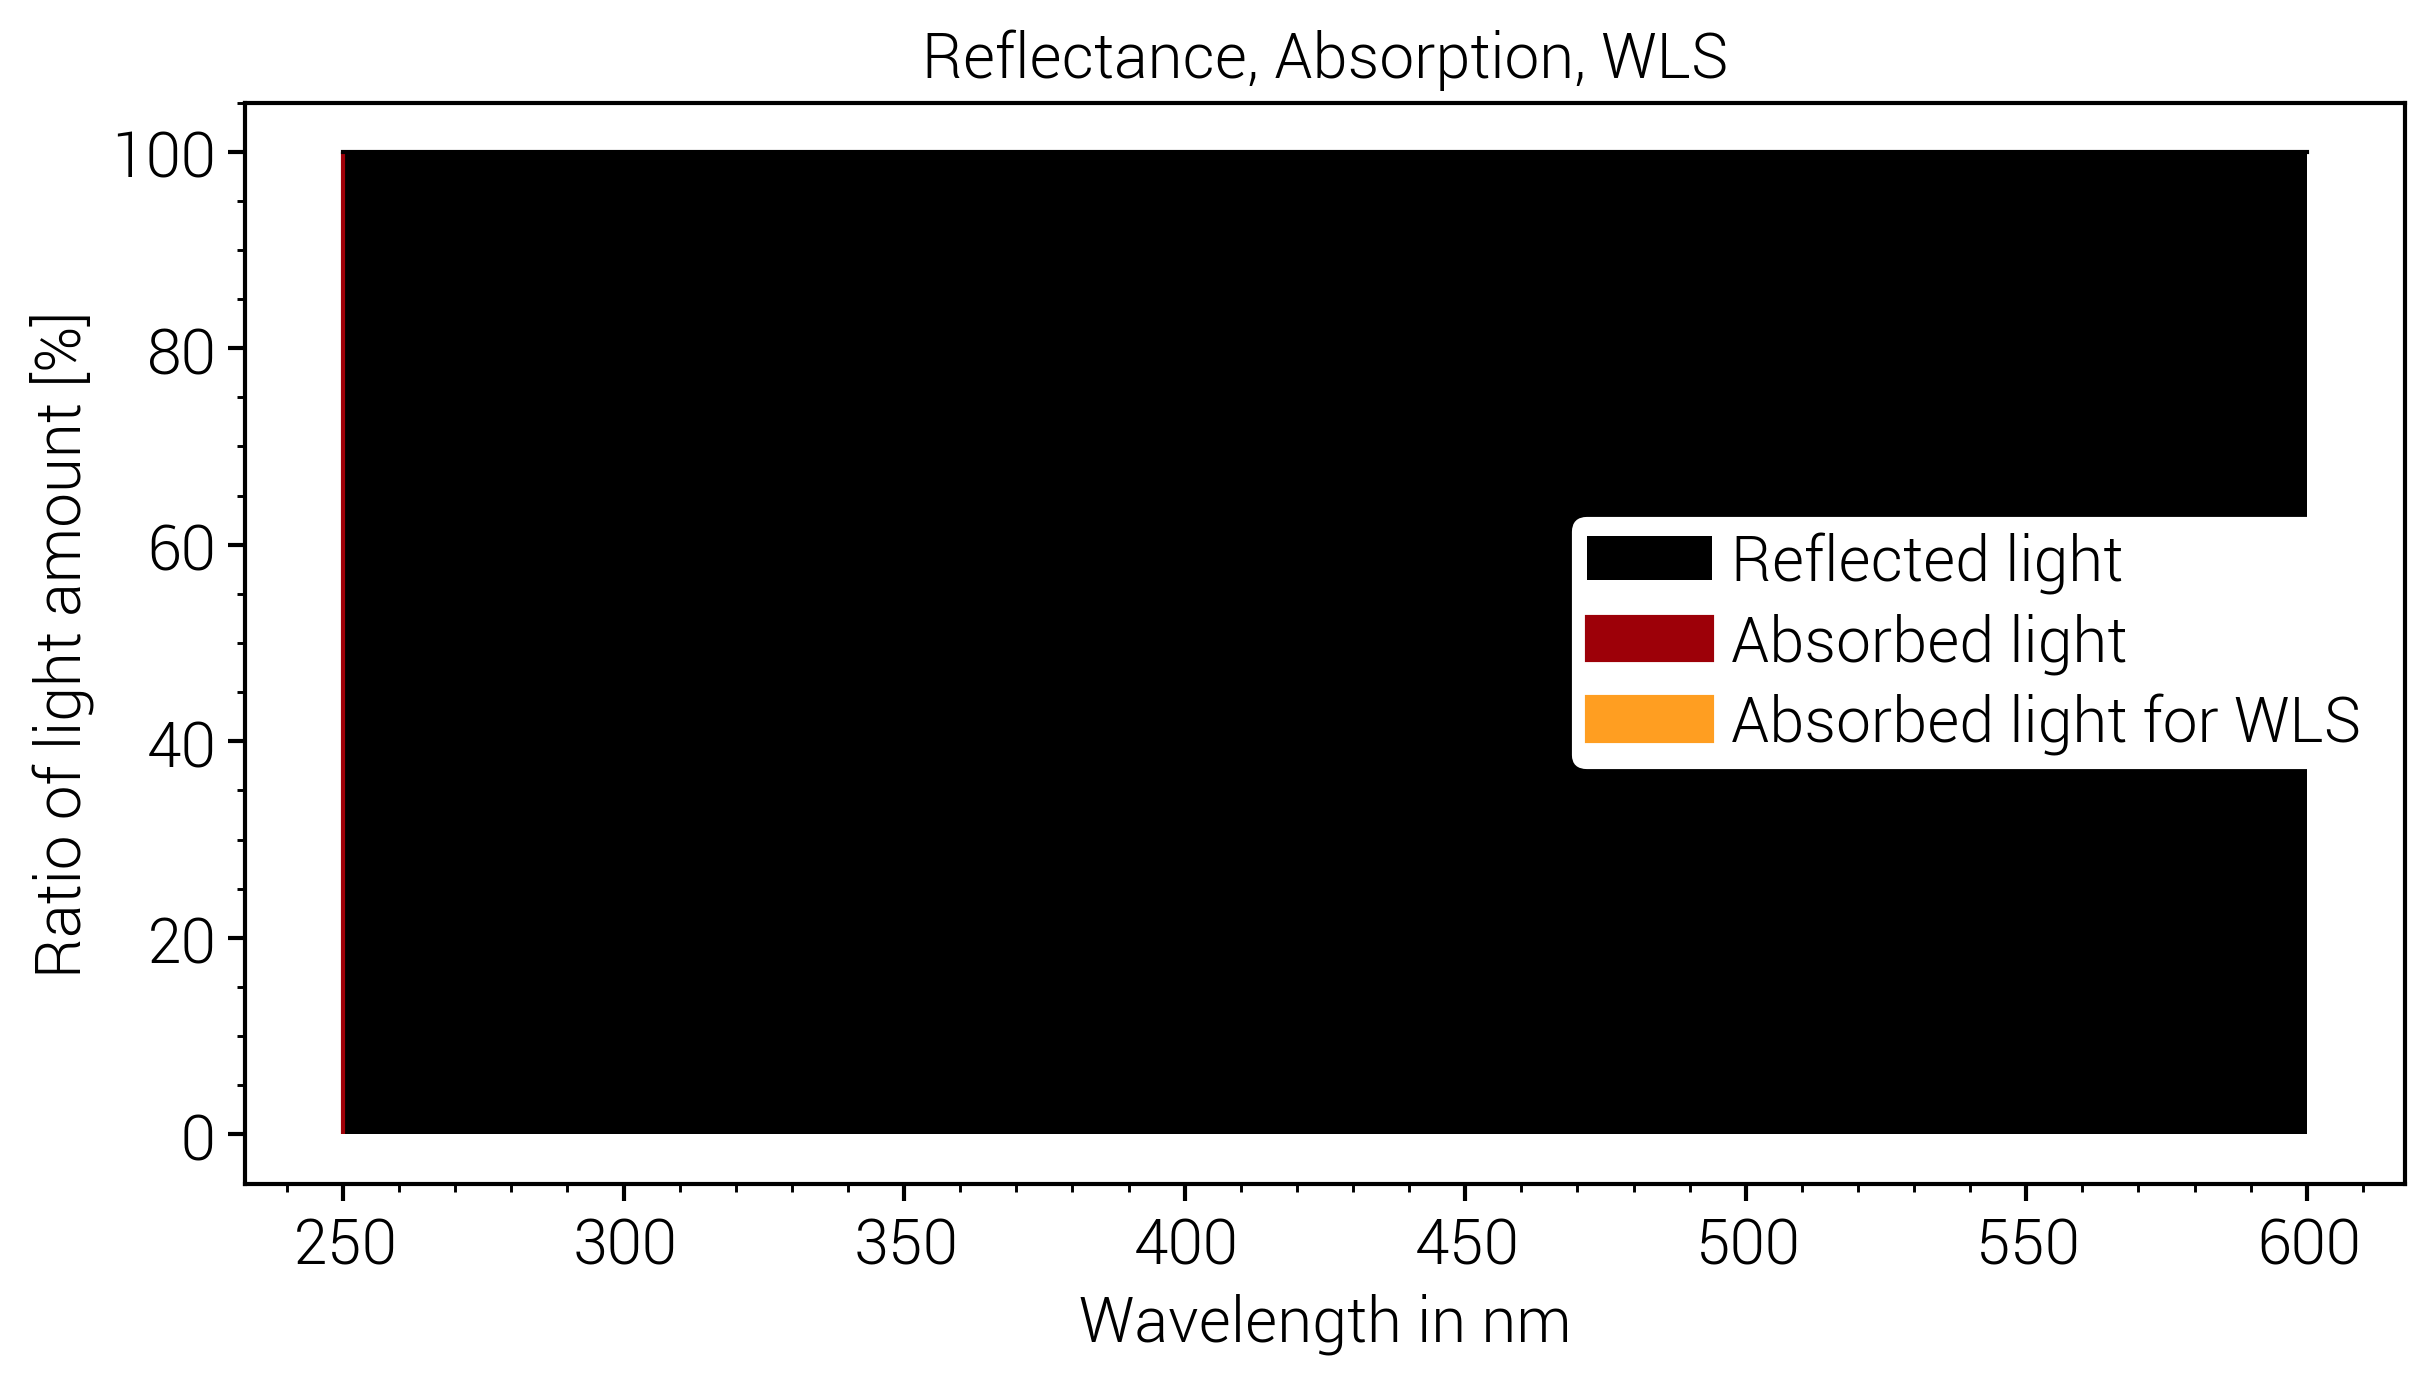

In [3]:
wavelengths = np.arange(250, 601)
absorbed = Get_Percentage_Absorbed(LambdaIn, LambdaOut, wavelengths)
reflected = Get_Percentage_Reflected(wavelengths)
absorbedWLS = Get_Percentage_Absorbed_for_WLS(LambdaIn, LambdaOut, wavelengths)

fig, ax1 = plt.subplots()
ax1.plot(wavelengths, reflected)
ax1.fill_between(wavelengths, reflected, label = "Reflected light")
ax1.plot(wavelengths, absorbed,  color = lps.colors["darkred"])
ax1.fill_between(wavelengths, absorbed, color = lps.colors["darkred"], label = "Absorbed light")
ax1.plot(wavelengths, absorbedWLS,  color = lps.colors["legend_orange"])
ax1.fill_between(wavelengths, absorbedWLS, color = lps.colors["legend_orange"], label = "Absorbed light for WLS")

# Set minor ticks locator
minor_locator = ticker.MultipleLocator(0.2)  # Minor ticks every 0.2 units
ax1.xaxis.set_minor_locator(minor_locator)
ax1.yaxis.set_minor_locator(minor_locator)

# Activate the minor ticks
ax1.minorticks_on()


ax1.set_xlabel('Wavelength in nm')
ax1.set_ylabel('Ratio of light amount [%]')
ax1.set_title('Reflectance, Absorption, WLS')
#ax1.grid()
ax1.legend(loc='center right', facecolor='white', framealpha=1)
#ax1.set_legend_logo(position="lower left")
plt.savefig("/home/eric/sim/WWLegend/Plots/WLS/Reflectance_Absorption.png", dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

Now reproduce 2D histogram

In [4]:
def get_shifted(LambdaIn, LambdaOut):
    ShiftedIn = LambdaIn[~((LambdaIn == LambdaOut) | (LambdaOut == 0))]
    ShiftedOut = LambdaOut[~((LambdaIn == LambdaOut) | (LambdaOut == 0))]
    return ShiftedIn, ShiftedOut

/home/eric/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:1065: RuntimeWarning: invalid value encountered in divide
  hist /= s


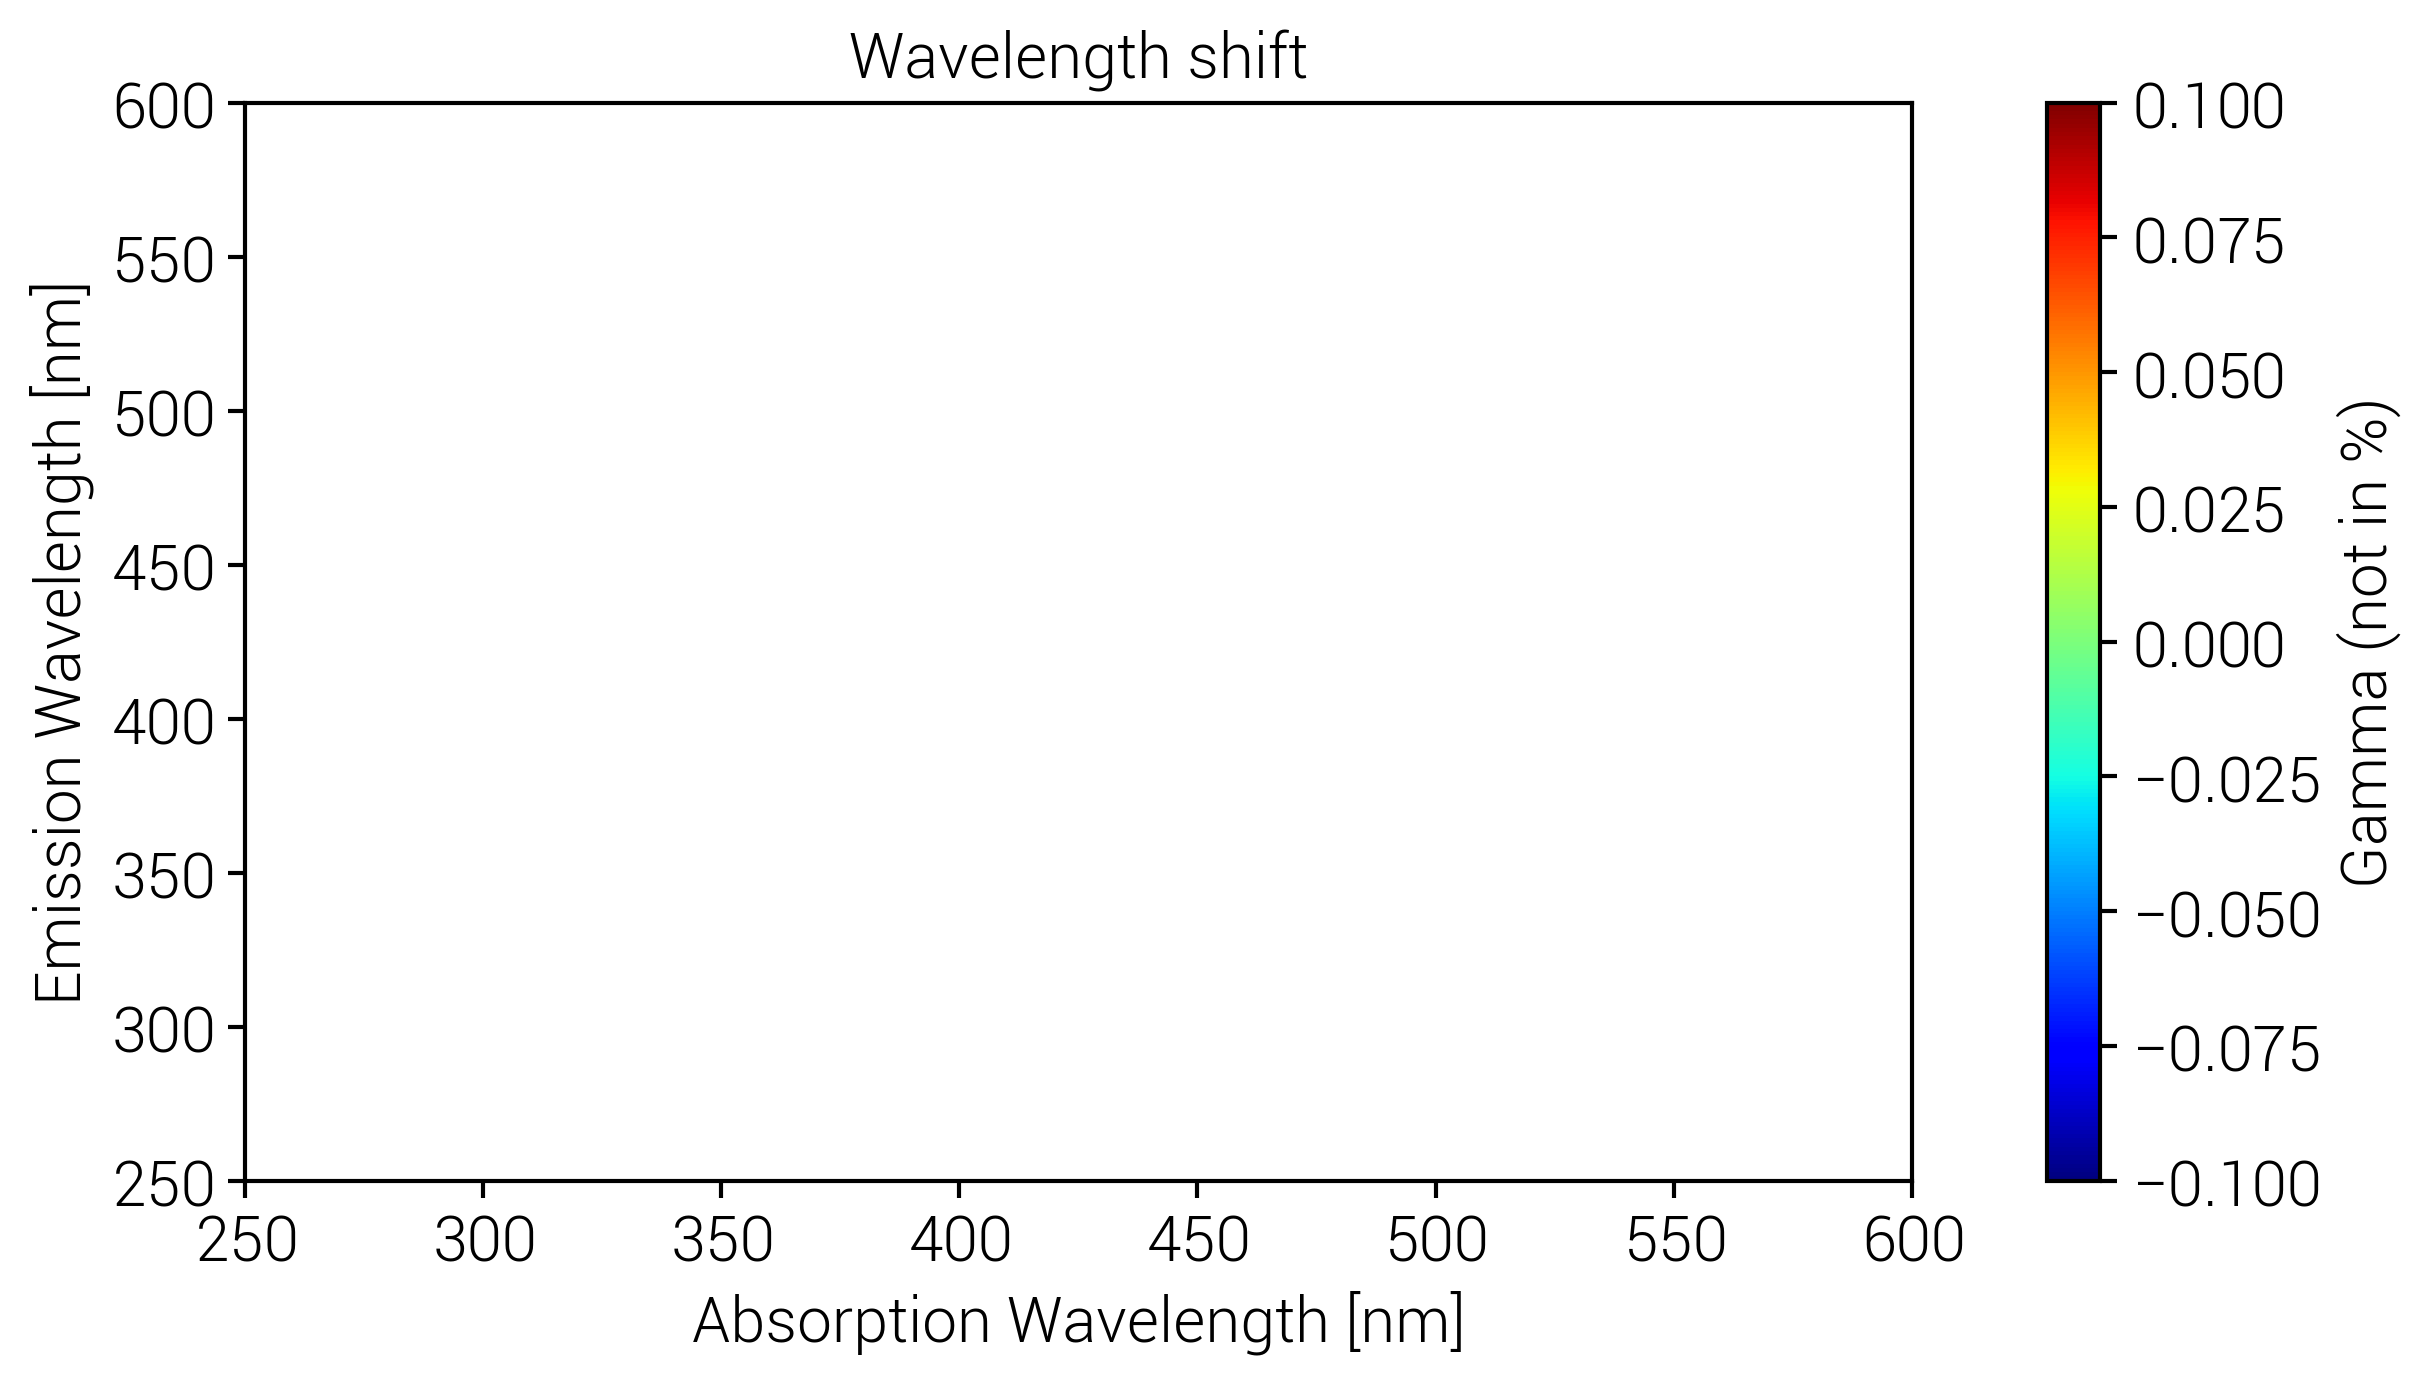

In [5]:
ShiftedIn, ShiftedOut = get_shifted(LambdaIn, LambdaOut)

fig, ax1 = plt.subplots()
ax1.plot(wavelengths, reflected)


plt.hist2d(ShiftedIn,ShiftedOut, bins = (70,351), range= ((250,600),(250,600)), cmap='jet', density=True, label='Heatmap')
plt.xlabel('Absorption Wavelength [nm]')
plt.ylabel('Emission Wavelength [nm]')
plt.ylim(ymin=250, ymax=600)
plt.title('Wavelength shift')
plt.colorbar(label='Gamma (not in %)')
plt.savefig("/home/eric/sim/WWLegend/Plots/WLS/Wavelength_shift.png", dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

Third Plot

/home/eric/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


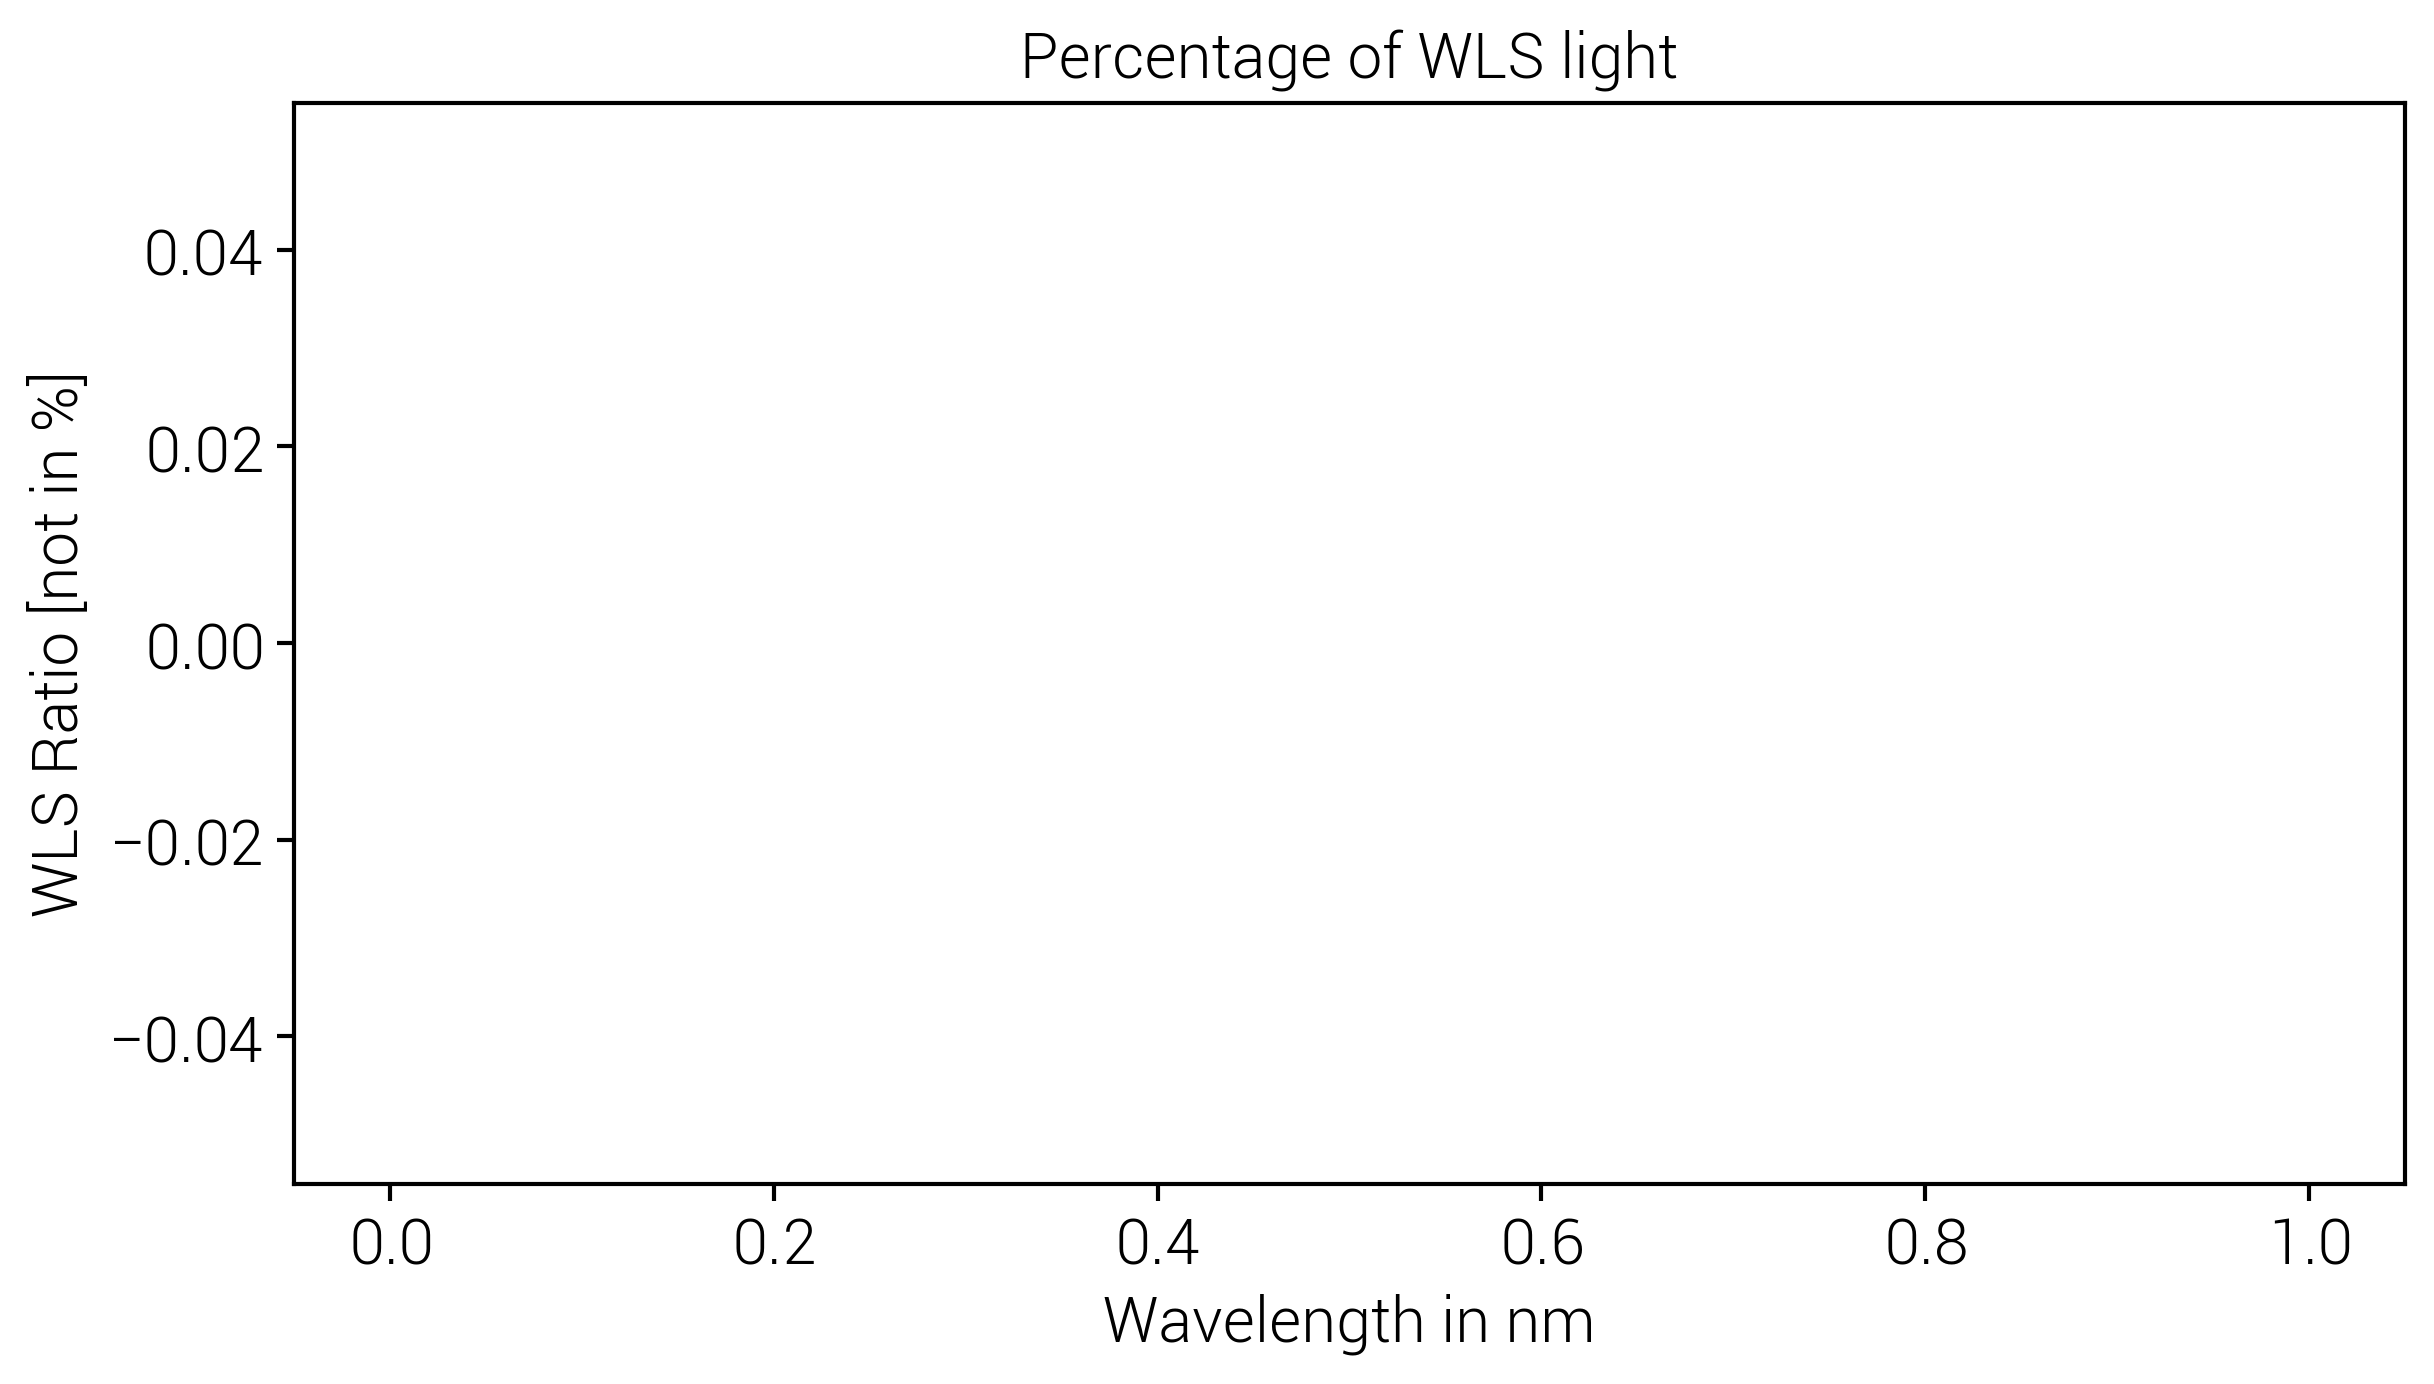

In [6]:
fig, ax1 = plt.subplots()

ax1.hist(ShiftedIn, density=True, histtype="step", bins=34)


ax1.set_xlabel('Wavelength in nm')
ax1.set_ylabel('WLS Ratio [not in %]')
ax1.set_title('Percentage of WLS light')
#ax1.grid()
#ax1.set_legend_logo(position="lower left")
plt.savefig("/home/eric/sim/WWLegend/Plots/WLS/Percentage_of_WLS_light.png", dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

Compare Knapp 2x

In [7]:

#yes i am that stupid/lazy
Efficiency = np.array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
                       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
                       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
                       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.001 ,
                       0.002 , 0.003 , 0.004 , 0.005 , 0.006 , 0.007 , 0.008 , 0.009 ,
                       0.01  , 0.019 , 0.028 , 0.037 , 0.046 , 0.055 , 0.064 , 0.073 ,
                       0.082 , 0.091 , 0.1   , 0.104 , 0.108 , 0.112 , 0.116 , 0.12  ,
                       0.124 , 0.128 , 0.132 , 0.136 , 0.14  , 0.144 , 0.148 , 0.152 ,
                       0.156 , 0.16  , 0.164 , 0.168 , 0.172 , 0.176 , 0.18  , 0.184 ,
                       0.188 , 0.192 , 0.196 , 0.2   , 0.204 , 0.208 , 0.212 , 0.216 ,
                       0.22  , 0.224 , 0.228 , 0.232 , 0.236 , 0.24  , 0.244 , 0.248 ,
                       0.252 , 0.256 , 0.26  , 0.264 , 0.268 , 0.272 , 0.276 , 0.28  ,
                       0.284 , 0.288 , 0.292 , 0.296 , 0.3   , 0.3   , 0.3   , 0.3   ,
                       0.3   , 0.3   , 0.3   , 0.3   , 0.3   , 0.3   , 0.3   , 0.3   ,
                       0.3   , 0.3   , 0.3   , 0.3   , 0.3   , 0.3   , 0.3   , 0.3   ,
                       0.3   , 0.299 , 0.298 , 0.297 , 0.296 , 0.295 , 0.294 , 0.293 ,
                       0.292 , 0.291 , 0.29  , 0.289 , 0.288 , 0.287 , 0.286 , 0.285 ,
                       0.284 , 0.283 , 0.282 , 0.281 , 0.28  , 0.28  , 0.28  , 0.28  ,
                       0.28  , 0.28  , 0.28  , 0.28  , 0.28  , 0.28  , 0.28  , 0.2789,
                       0.2778, 0.2767, 0.2756, 0.2745, 0.2734, 0.2723, 0.2712, 0.2701,
                       0.269 , 0.2679, 0.2668, 0.2657, 0.2646, 0.2635, 0.2624, 0.2613,
                       0.2602, 0.2591, 0.258 , 0.2569, 0.2558, 0.2547, 0.2536, 0.2525,
                       0.2514, 0.2503, 0.2492, 0.2481, 0.247 , 0.2459, 0.2448, 0.2437,
                       0.2426, 0.2415, 0.2404, 0.2393, 0.2382, 0.2371, 0.236 , 0.2349,
                       0.2338, 0.2327, 0.2316, 0.2305, 0.2294, 0.2283, 0.2272, 0.2261,
                       0.225 , 0.2235, 0.222 , 0.2205, 0.219 , 0.2175, 0.216 , 0.2145,
                       0.213 , 0.2115, 0.21  , 0.2085, 0.207 , 0.2055, 0.204 , 0.2025,
                       0.201 , 0.1995, 0.198 , 0.1965, 0.195 , 0.1935, 0.192 , 0.1905,
                       0.189 , 0.1875, 0.186 , 0.1845, 0.183 , 0.1815, 0.18  , 0.1785,
                       0.177 , 0.1755, 0.174 , 0.1725, 0.171 , 0.1695, 0.168 , 0.1665,
                       0.165 , 0.1635, 0.162 , 0.1605, 0.159 , 0.1575, 0.156 , 0.1545,
                       0.153 , 0.1515, 0.15  , 0.148 , 0.146 , 0.144 , 0.142 , 0.14  ,
                       0.138 , 0.136 , 0.134 , 0.132 , 0.13  , 0.128 , 0.126 , 0.124 ,
                       0.122 , 0.12  , 0.118 , 0.116 , 0.114 , 0.112 , 0.11  , 0.108 ,
                       0.106 , 0.104 , 0.102 , 0.1   , 0.098 , 0.096 , 0.094 , 0.092 ,
                       0.09  , 0.088 , 0.086 , 0.084 , 0.082 , 0.08  , 0.078 , 0.076 ,
                       0.074 , 0.072 , 0.07  , 0.068 , 0.066 , 0.064 , 0.062 , 0.06  ,
                       0.058 , 0.056 , 0.054 , 0.052 , 0.05  , 0.0492, 0.0484, 0.0476,
                       0.0468, 0.046 , 0.0452, 0.0444, 0.0436, 0.0428, 0.042 , 0.0412,
                       0.0404, 0.0396, 0.0388, 0.038 , 0.0372, 0.0364, 0.0356, 0.0348,
                       0.034 , 0.0332, 0.0324, 0.0316, 0.0308, 0.03  , 0.0292, 0.0284,
                       0.0276, 0.0268, 0.026 , 0.0252, 0.0244, 0.0236, 0.0228, 0.022 ,
                       0.0212, 0.0204, 0.0196, 0.0188, 0.018 , 0.0172, 0.0164, 0.0156,
                       0.0148, 0.014 , 0.0132, 0.0124, 0.0116, 0.0108, 0.01  ])


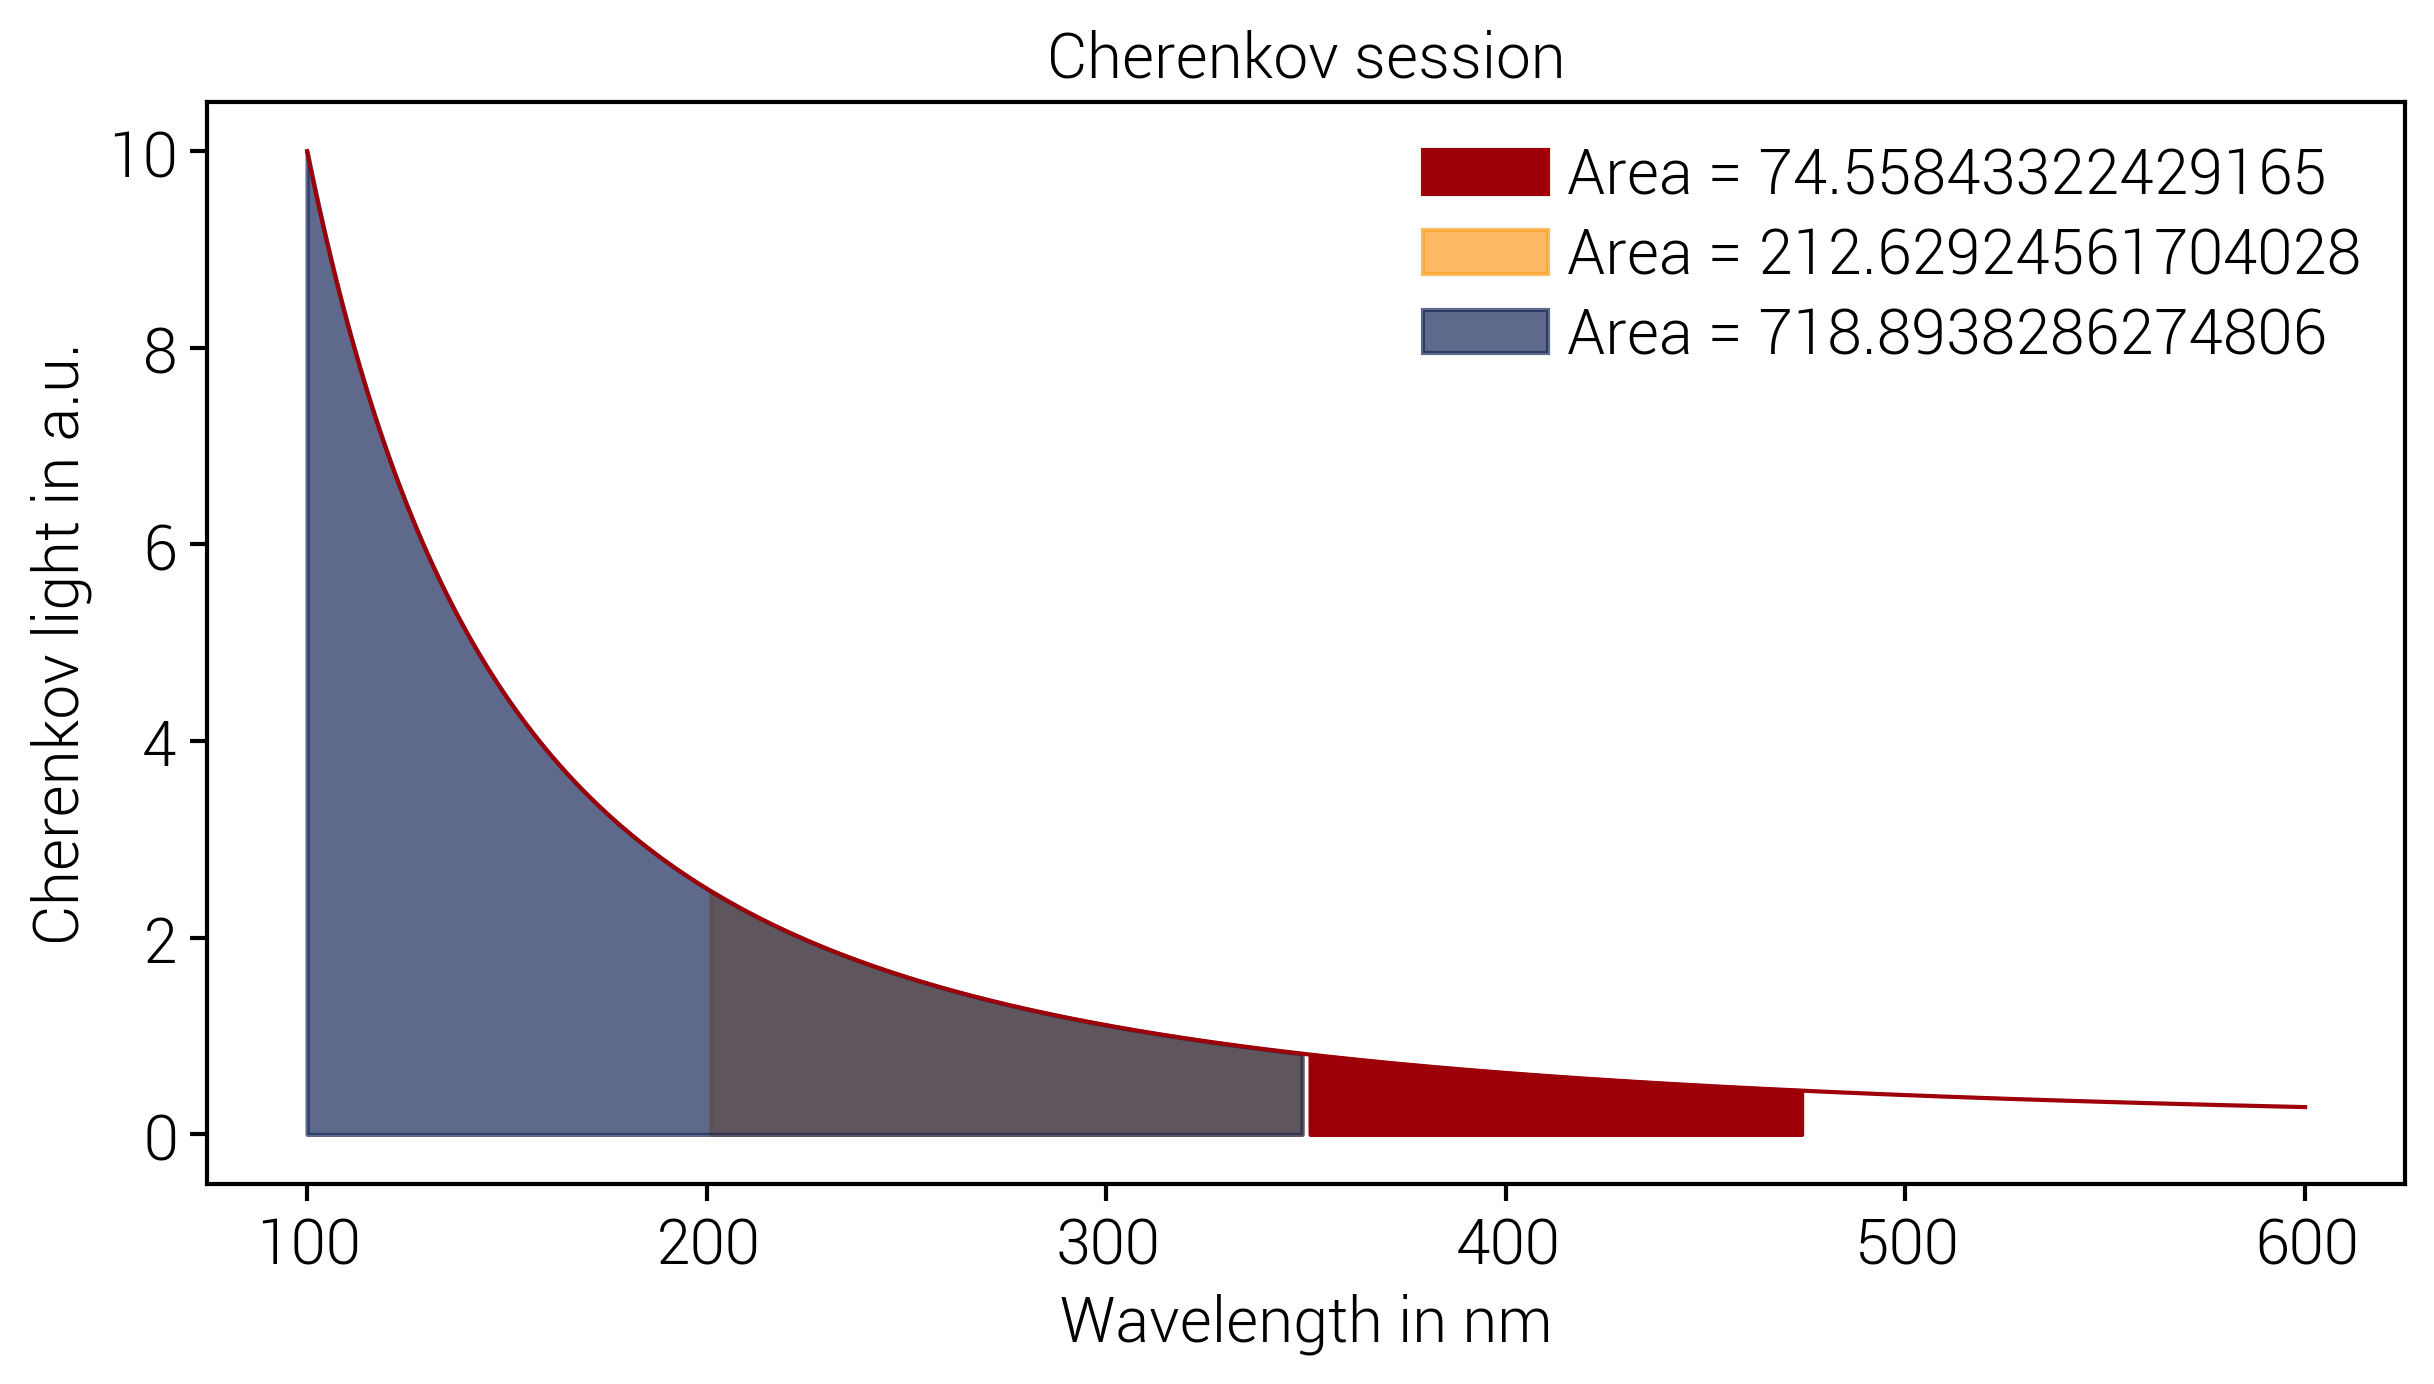

In [8]:
wavelengths = np.arange(100, 601)

def Cherenkov_yield(wavelength):
    return 1e5 / (wavelength*wavelength)

fig, ax1 = plt.subplots()
ax1.plot(wavelengths, Cherenkov_yield(wavelengths), color = lps.colors["darkred"])
condition = (wavelengths>350) & (wavelengths < 475)
area1 = np.sum(Cherenkov_yield(wavelengths[condition]))
ax1.fill_between(wavelengths[condition], Cherenkov_yield(wavelengths[condition]), color = lps.colors["darkred"], label=f"Area = {area1}")
condition2 = (wavelengths>200) & (wavelengths < 350)
area2 = np.sum(Cherenkov_yield(wavelengths[condition2]))
ax1.fill_between(wavelengths[condition2], Cherenkov_yield(wavelengths[condition2]), alpha=0.7, color = lps.colors["legend_orange"], label=f"Area = {area2}")
condition3 = (wavelengths < 350)
area3 = np.sum(Cherenkov_yield(wavelengths[condition3]))
ax1.fill_between(wavelengths[condition3], Cherenkov_yield(wavelengths[condition3]), alpha=0.7, color = lps.colors["legend_darkblue"], label=f"Area = {area3}")





ax1.set_xlabel('Wavelength in nm')
ax1.set_ylabel('Cherenkov light in a.u.')
ax1.set_title('Cherenkov session')
#ax1.grid()
ax1.legend(loc='upper right', facecolor='white', framealpha=1)
#ax1.set_legend_logo(position="lower left")
#plt.savefig("/home/eric/sim/WWLegend/Plots/WLS/Reflectance_Absorption.png", dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()